In [10]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import math
import ephem
from datetime import datetime, time, timedelta
from math import pi, cos, sin
%run fetch_model_helper.py
%run diurnal_utils.py

In [11]:
model_dirs = ['hfss_mon_historical','hfls_mon_historical','lwp_mon_historical', 'pr_3hr_historical']
path_to_cmip_dirs = '/export/data1/cchristo/CMIP6_precip/pr_3hr_historical/'
path_to_cmip_dirs = '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/'

rel_path_to_computed_diurnal_fields = '/export/data1/cchristo/diurnal_analysis_results/'
rel_data_path = '/export/data1/cchristo/'
# path_to_computed_diurnal_fields = '/export/data1/cchristo/diurnal_analysis_results/CMIP6/'

In [26]:
# set([path_i.split('_')[-2] for path_i in os.listdir(path_to_cmip_dirs)])

ds = xr.open_dataset(rel_data_path + 'CMIP6_rh/averages/time_averages/period/rh_500/GISS-E2-1-H/1985-01_2006-01_mean.nc')

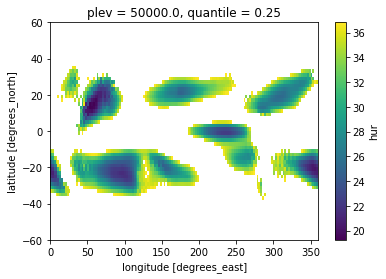

In [27]:
ds['hur'].where(ds['hur'] < ds['hur'].quantile(.25)).plot.imshow()

In [271]:
unique_models = get_unique_models(path_to_cmip_dirs)

In [272]:
unique_models

{'ACCESS1-0',
 'ACCESS1-3',
 'CMCC-CM',
 'CNRM-CM5',
 'FGOALS-g2',
 'FGOALS-s2',
 'GFDL-CM3',
 'GFDL-ESM2G',
 'GFDL-ESM2M',
 'GISS-E2-H',
 'GISS-E2-R',
 'HadGEM2-ES',
 'IPSL-CM5A-LR',
 'IPSL-CM5A-MR',
 'MIROC-ESM',
 'MIROC-ESM-CHEM',
 'MIROC4h',
 'MIROC5',
 'MRI-CGCM3',
 'MRI-ESM1',
 'NorESM1-M',
 'inmcm4'}

In [23]:
unique_ensembles = get_unique_ensembles_cmip6(path_to_cmip_dirs)
# unique_ensembles = get_unique_ensembles_cmip5(path_to_cmip_dirs)

In [243]:
# get_path_to_desired_model_cmip6(path_to_cmip_dirs, desired_model = 'EC-Earth3-Veg')

In [ ]:
#errors 

# Could not process KACE-1-0-G
# unsupported operand type(s) for *: 'cftime._cftime.Datetime360Day' and
#  'float'

# Could not process UKESM1-0-LL
# unsupported operand type(s) for *: 'cftime._cftime.Datetime360Day' and
#  'float'

#Could not process GFDL-CM4
# Resulting object does not have monotonic global indexes along dimensio
# n lon

In [269]:
# unique_ensembles

In [316]:
# model_name = list(unique_models)[16]
model_name = 'EC-Earth3-Veg'
print(model_name)
path_to_dirunal_nc = path_to_computed_diurnal_fields + model_name + '/' + '1985-01_2006-01_precip.nc'
path_to_means_nc = path_to_computed_diurnal_fields + model_name + '/' + '1985-01_2006-01_precip_diurnal_means.nc'

ds_diurnal = xr.open_dataset(path_to_dirunal_nc)
ds_means = xr.open_dataset(path_to_means_nc)

ds_diurnal_gpm  =  xr.open_dataset(rel_path_to_computed_diurnal_fields + 'GPM/' + '2000-06_2010-06_precip.nc')
ds_means_gpm = xr.open_dataset(rel_path_to_computed_diurnal_fields + 'GPM/' + '2000-06_2010-06_precip_diurnal_means.nc')

# ds_diurnal.input_dataset_paths

EC-Earth3-Veg


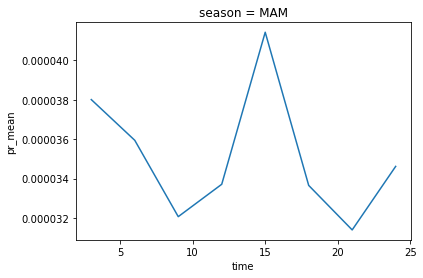

In [292]:
ds_means.mean(dim = ['lon','lat']).isel(season = 2)['pr_mean'].plot()

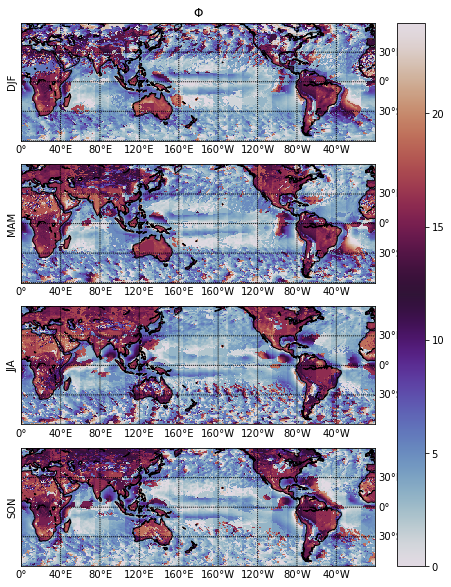

In [309]:
make_four_panel(ds_diurnal['phase_season'] , vmin = 0, vmax = 24.0)

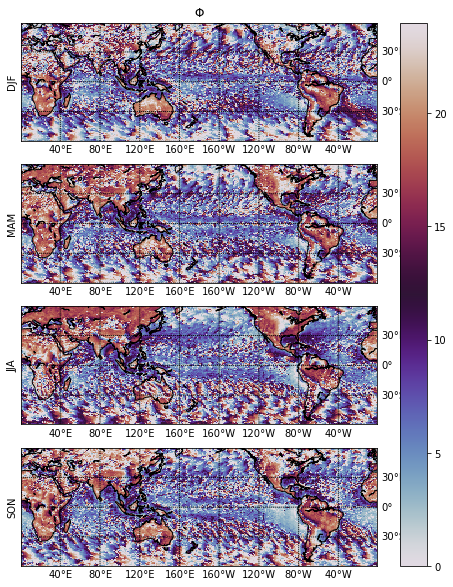

In [317]:
make_four_panel(ds_diurnal_gpm['phase_season'], vmin = 0.0, vmax = 24.0)

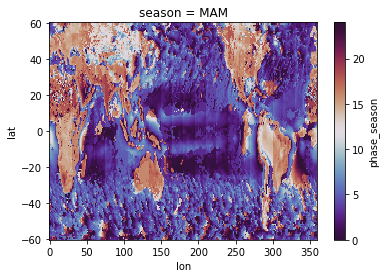

In [298]:
ds_diurnal.isel(season = 2)['phase_season'].plot.imshow(cmap = plt.get_cmap('twilight_shifted'), vmin = 0, vmax = 24)
# ds

In [302]:
'DJF' in ds_diurnal['season']

True

In [305]:
# ds_diurnal['lat'].values

In [60]:

path_to_dirunal_nc_gpm = '/export/data1/cchristo/diurnal_analysis_results/GPM/' + '2000-06_2010-06_precip.nc'
path_to_means_nc_gpm = '/export/data1/cchristo/diurnal_analysis_results/GPM/' + '2000-06_2010-06_precip_diurnal_means.nc'
ls_mask_nc = '/export/data1/cchristo/land_sea_masks/land_sea_masks_regridded/GFDL-CM4_grid/' + 'GLDAS_rg_gfdl_cm4.nc'

In [161]:
ds_diurnal_gpm = xr.open_dataset(path_to_dirunal_nc_gpm)
ds_means_gpm = xr.open_dataset(path_to_means_nc_gpm)
ds_ls_mask = xr.open_dataset(ls_mask_nc)
ds_ls_mask.load()
ds_means_gpm.load()
# ds_means_gpm['ls_mask'] = ds_ls_mask['GLDAS_mask']

<xarray.Dataset>
Dimensions:                (lat: 120, lon: 288, season: 4, time: 48)
Coordinates:
  * season                 (season) object 'DJF' 'JJA' 'MAM' 'SON'
  * time                   (time) float64 0.5 1.0 1.5 2.0 ... 23.0 23.5 24.0
  * lon                    (lon) float64 0.625 1.875 3.125 ... 356.9 358.1 359.4
  * lat                    (lat) float64 -59.5 -58.5 -57.5 ... 57.5 58.5 59.5
Data variables:
    precipitationCal_mean  (season, time, lat, lon) float64 0.1448 ... 0.1755

In [131]:
ds_ls_mask['GLDAS_mask']

<xarray.DataArray 'GLDAS_mask' (time: 1, lat: 120, lon: 288)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01
  * lon      (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
  * lat      (lat) float64 -59.5 -58.5 -57.5 -56.5 -55.5 ... 56.5 57.5 58.5 59.5
Attributes:
    regrid_method:  nearest_s2d

In [152]:
# cur_mask.shape
time_ii.values.reshape(1)

array([0.5])

In [160]:
# mask_time = xr.Dataset()
objs = []
for time_ii in ds_means_gpm.time:
    cur_mask = ds_ls_mask['GLDAS_mask'].copy().drop('time')
#     cur_mask['time'] = time_ii
    cur_mask_new = xr.DataArray(cur_mask.values, 
                                dims = ('time','lat','lon'), 
                                coords = {'time': time_ii.values.reshape(1), 
                                'lat': cur_mask['lat'].values, 
                                'lon': cur_mask['lon'].values}, 
                               name = 'ls_mask')
    objs.append(cur_mask_new)
ls_mask_time = xr.merge(objs)

In [168]:

ds_means_gpm = xr.merge((ds_means_gpm, ls_mask_time))

In [169]:
# ds_means_gpm
ds_means_gpm


<xarray.Dataset>
Dimensions:                (lat: 120, lon: 288, season: 4, time: 48)
Coordinates:
  * season                 (season) object 'DJF' 'JJA' 'MAM' 'SON'
  * time                   (time) float64 0.5 1.0 1.5 2.0 ... 23.0 23.5 24.0
  * lon                    (lon) float64 0.625 1.875 3.125 ... 356.9 358.1 359.4
  * lat                    (lat) float64 -59.5 -58.5 -57.5 ... 57.5 58.5 59.5
Data variables:
    precipitationCal_mean  (season, time, lat, lon) float64 0.1448 ... 0.1755
    ls_mask                (time, lat, lon) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0

In [229]:
ds_means_gpm_subset = ds_means_gpm.sel(lat = slice(-50,-25)).isel(season = 0) #['precipitationCal_mean']
ds_means_gpm_subset_land = ds_means_gpm_subset.where(ds_means_gpm_subset['ls_mask'] == 1)
ds_means_gpm_subset_water = ds_means_gpm_subset.where(ds_means_gpm_subset['ls_mask'] == 0)

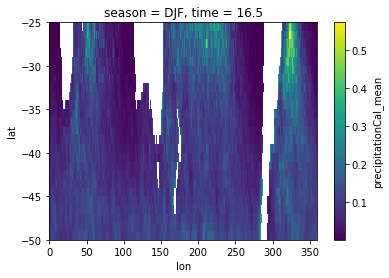

In [242]:
# ds_means_gpm['ls_mask'].isel(time = 1).plot.imshow()
ds_means_gpm_subset_water['precipitationCal_mean'].isel(time = 32).plot.imshow()


(-0.5, 1.3)

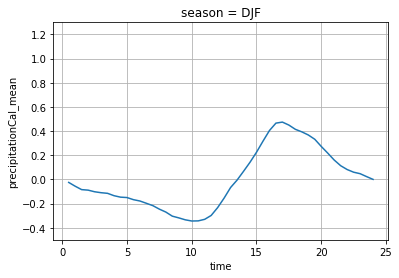

In [236]:
# ds_ls_mask['GLDAS_mask']
mean_land = ds_means_gpm_subset_land['precipitationCal_mean'].mean(dim = ['lon','lat'])
((mean_land - mean_land.mean())/ mean_land.mean()).plot()
plt.grid()
plt.ylim([-0.5, 1.3])

In [212]:
# ds_means_gpm_subset_land['precipitationCal_mean'].isel(time = 12).plot.imshow()

In [183]:
# ds_means_gpm_subset_land['precipitationCal_mean']

(-0.3, 0.4)

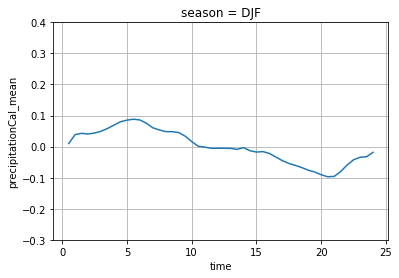

In [238]:
mean_sea = ds_means_gpm_subset_water['precipitationCal_mean'].mean(dim = ['lon','lat'])
((mean_sea - mean_sea.mean())/mean_sea.mean()).plot()
plt.grid()
plt.ylim([-0.3, 0.4])

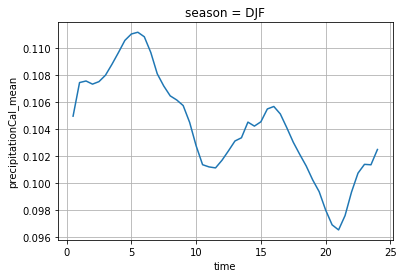

In [91]:
ds_means_gpm_subset.mean(dim = ['lon','lat']).plot()
plt.grid()

In [11]:
# file_list
file_names_ = os.listdir( path_to_cmip_dirs + model_dirs[0])
hfss_models = set([ii.split('_')[2] for ii in file_names_])

file_names_ = os.listdir( path_to_cmip_dirs + model_dirs[1])
hfls_models = set([ii.split('_')[2] for ii in file_names_])

file_names_ = os.listdir( path_to_cmip_dirs + model_dirs[2])
lwp_models = set([ii.split('_')[2] for ii in file_names_])
# file_names
set.intersection(hfss_models, hfls_models, lwp_models)

{'CESM2',
 'CESM2-FV2',
 'CESM2-WACCM',
 'CESM2-WACCM-FV2',
 'CanESM5',
 'CanESM5-CanOE',
 'MIROC-ES2L'}

In [16]:
ds = xr.open_dataset(path_to_cmip_dirs + 'download_from_source/GFDL-CM4/' + \
               "pr_3hr_GFDL-CM4_historical_r1i1p1f1_gr1_196001010130-197912312230.nc")

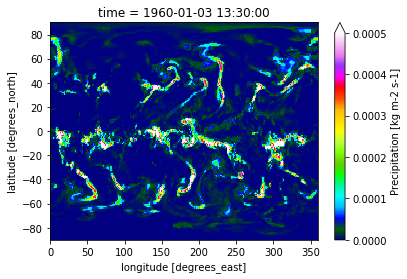

In [26]:
ds['pr'].isel(time = 20).plot.imshow(vmax = .0005, cmap = plt.get_cmap('gist_ncar'))

In [2]:
# Explore CMIP6 Files 

In [3]:
path_to_cmip_dirs = '/export/data1/cchristo/cmip6_clouds/download_from_source/'

In [8]:
model_list = os.listdir(path_to_cmip_dirs)
print(model_list)
path_to_cmip_files = path_to_cmip_dirs + 'GFDL-ESM4/'
file_list = os.listdir(path_to_cmip_files)
for file in file_list: print(file)

['GFDL-CM4', 'CNRM-CM5', 'GFDL-ESM4', 'IPSL-CM6A']
clt_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_185001-194912.nc
clt_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_195001-201412.nc


In [7]:
# ds = xr.open_dataset(path_to_cmip_dirs + )